In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import ast
import pyarrow as arrow

from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from fastapi import FastAPI, HTTPException

In [3]:
dfc = pd.read_csv ("D:\Desktop\Programacion Basica\Data Science\PI1\credits.csv")
dfc


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [4]:
print(dfc.loc[4258, 'cast'])
dfc.rename(columns={'id': 'Superid'}, inplace=True)

[{'cast_id': 1, 'character': 'Professor Brody', 'credit_id': '52fe43de9251416c7502142d', 'gender': 2, 'id': 4785, 'name': 'Jeff Goldblum', 'order': 0, 'profile_path': '/w9frUiRJUyRnWvFqihtS31q6LWc.jpg'}, {'cast_id': 2, 'character': 'Mrs. Brody', 'credit_id': '52fe43de9251416c75021431', 'gender': 1, 'id': 20, 'name': 'Elizabeth Perkins', 'order': 1, 'profile_path': '/bkdWnnrMADJcFpKAOitMjQH3uEQ.jpg'}, {'cast_id': 3, 'character': 'Scotty Brody', 'credit_id': '52fe43de9251416c75021435', 'gender': 2, 'id': 67817, 'name': 'Alexander Pollock', 'order': 2, 'profile_path': '/6GPVGBkPidrKFsardUj51K39SGx.jpg'}, {'cast_id': 4, 'character': 'Sophie the Castle Maid', 'credit_id': '52fe43de9251416c75021439', 'gender': 1, 'id': 6199, 'name': 'Miriam Margolyes', 'order': 3, 'profile_path': '/7Fijg5sZ7gKbooq6tId3MUS5sDY.jpg'}, {'cast_id': 17, 'character': 'Lou(voice)', 'credit_id': '5855d782c3a368258f03f1cd', 'gender': 2, 'id': 2219, 'name': 'Tobey Maguire', 'order': 5, 'profile_path': '/l8e9we9RmTsYgN

In [5]:
##Se inicia el desanidado de los datos con casat, en crew me doy cuenta de que no hace falta desanidado
dfc['cast'] = dfc['cast'].apply(ast.literal_eval)

dfc_exploded = dfc.explode('cast').reset_index(drop=True)

dfc= pd.concat([dfc_exploded.drop(['cast'], axis=1), 
                    dfc_exploded['cast'].apply(pd.Series)], axis=1)


In [6]:
dfc

,crew,Superid,cast_id,character,credit_id,gender,id,name,order,profile_path,0
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,14.0,Woody (voice),52fe4284c3a36847f8024f95,2.0,31.0,Tom Hanks,0.0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg,NaN
1,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,15.0,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2.0,12898.0,Tim Allen,1.0,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg,NaN
2,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,16.0,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2.0,7167.0,Don Rickles,2.0,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg,NaN
3,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,17.0,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2.0,12899.0,Jim Varney,3.0,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg,NaN
4,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,18.0,Rex (voice),52fe4284c3a36847f8024fa5,2.0,12900.0,Wallace Shawn,4.0,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg,NaN
...,...,...,...,...,...,...,...,...,...,...,...
564887,"[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,3.0,,52fe4ea59251416c7515d7d9,1.0,1090923.0,Nathalie Lissenko,1.0,None,NaN
564888,"[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,4.0,,52fe4ea59251416c7515d7dd,2.0,1136422.0,Pavel Pavlov,2.0,None,NaN
564889,"[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,5.0,,52fe4ea59251416c7515d7e1,0.0,1261758.0,Aleksandr Chabrov,3.0,None,NaN
564890,"[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,6.0,,52fe4ea59251416c7515d7e5,1.0,29199.0,Vera Orlova,4.0,/n1NXVGNzNxtqsMWxLT1h8GO8Kpi.jpg,NaN


In [7]:
print(dfc.loc[15, 'crew'])



[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, 'i

In [8]:
# Paso 1: Convertir la columna 'crew' en listas de diccionarios
dfc['crew'] = dfc['crew'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

def extract_director(crew_list):
    # Filtra la lista para obtener solo los directores
    return [member for member in crew_list if member.get('job') == 'Director']

# Paso 2: Aplica la función para extraer solo los directores
dfc['crew'] = dfc['crew'].apply(extract_director)

# Paso 3: Si deseas obtener solo el nombre del director y eliminar el resto
def get_director_names(crew_list):
    return [member.get('name') for member in crew_list]

# Actualiza la columna 'crew' con solo los nombres de los directores
dfc['crew'] = dfc['crew'].apply(get_director_names)

# Asegúrate de que la columna 'crew' ahora solo tenga nombres de directores
print(dfc)

                      crew  Superid  cast_id                character  \
0          [John Lasseter]      862     14.0            Woody (voice)   
1          [John Lasseter]      862     15.0   Buzz Lightyear (voice)   
2          [John Lasseter]      862     16.0  Mr. Potato Head (voice)   
3          [John Lasseter]      862     17.0       Slinky Dog (voice)   
4          [John Lasseter]      862     18.0              Rex (voice)   
...                    ...      ...      ...                      ...   
564887  [Yakov Protazanov]   227506      3.0                            
564888  [Yakov Protazanov]   227506      4.0                            
564889  [Yakov Protazanov]   227506      5.0                            
564890  [Yakov Protazanov]   227506      6.0                            
564891     [Daisy Asquith]   461257      NaN                      NaN   

                       credit_id  gender         id               name  order  \
0       52fe4284c3a36847f8024f95     2.0  

In [9]:
dfc = dfc.drop(columns=['credit_id', 'gender', 'profile_path','id'])


In [10]:
dfc

,crew,Superid,cast_id,character,name,order,0
0,[John Lasseter],862,14.0,Woody (voice),Tom Hanks,0.0,NaN
1,[John Lasseter],862,15.0,Buzz Lightyear (voice),Tim Allen,1.0,NaN
2,[John Lasseter],862,16.0,Mr. Potato Head (voice),Don Rickles,2.0,NaN
3,[John Lasseter],862,17.0,Slinky Dog (voice),Jim Varney,3.0,NaN
4,[John Lasseter],862,18.0,Rex (voice),Wallace Shawn,4.0,NaN
...,...,...,...,...,...,...,...
564887,[Yakov Protazanov],227506,3.0,,Nathalie Lissenko,1.0,NaN
564888,[Yakov Protazanov],227506,4.0,,Pavel Pavlov,2.0,NaN
564889,[Yakov Protazanov],227506,5.0,,Aleksandr Chabrov,3.0,NaN
564890,[Yakov Protazanov],227506,6.0,,Vera Orlova,4.0,NaN


In [11]:
dfm = pd.read_csv ("D:\Desktop\Programacion Basica\Data Science\PI1\movies_dataset.csv")

dfm.shape

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15832\1233242611.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dfm = pd.read_csv ("D:\Desktop\Programacion Basica\Data Science\PI1\movies_dataset.csv")


(45466, 24)

In [12]:
# Identificar y eliminar valores no válidos (como fechas)
df = dfm[~dfm['id'].str.match(r'\d{4}-\d{2}-\d{2}', na=False)]

In [15]:
##se empieza el Data engineer en dfm antes de la fusion

## Se cambia nulos por 0 en revenue
dfm['revenue']=dfm['revenue'].fillna(0)
dfm['revenue']




# Se eliminan las filas con valores nulos en 'release_date'
dfm = dfm.dropna(subset=['release_date'])

##las fechas ya estan con el formato AAAA-MM-DD pero se pasa a datetime
dfm['release_date'] = pd.to_datetime(dfm['release_date'], errors='coerce', format='%Y-%m-%d')

##creo columna release year 
dfm['release_year'] = dfm['release_date'].dt.year

##creo columna return, primero paso a numeros los campos de revenue y budget

dfm['revenue'] = pd.to_numeric(dfm['revenue'], errors='coerce').fillna(0)
dfm['budget'] = pd.to_numeric(dfm['budget'], errors='coerce').fillna(0)

dfm['return'] = dfm.apply(lambda row: row['revenue'] / row['budget'] if pd.notna(row['revenue']) and pd.notna(row['budget']) and row['budget'] != 0 else 0, axis=1)

##Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage.

dfm = dfm.drop(columns=['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage','belongs_to_collection','tagline'])

# Convertir a texto primero para manejar diferentes formatos
dfm['id'] = dfm['id'].astype(str)



# Ahora convertir la columna 'id' a enteros
dfm['id'] = dfm['id'].astype(int)

##aqui se hace realidad, se convinan los df , para crear el df de esta funcion 
##normalizar el dato
dfc.rename(columns={'Superid': 'id'}, inplace=True)
dfc['id'] = dfc['id'].astype(int)
dfm['id'] = dfm['id'].astype(int)
# Unir los DataFrames por la columna 'key'
df = pd.merge(dfc, dfm, on='id', how='inner')

df


,crew,id,cast_id,character,name,order,0,budget,genres,original_language,...,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,release_year,return
0,[John Lasseter],862,14.0,Woody (voice),Tom Hanks,0.0,NaN,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1995,12.451801
1,[John Lasseter],862,15.0,Buzz Lightyear (voice),Tim Allen,1.0,NaN,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1995,12.451801
2,[John Lasseter],862,16.0,Mr. Potato Head (voice),Don Rickles,2.0,NaN,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1995,12.451801
3,[John Lasseter],862,17.0,Slinky Dog (voice),Jim Varney,3.0,NaN,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1995,12.451801
4,[John Lasseter],862,18.0,Rex (voice),Wallace Shawn,4.0,NaN,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1995,12.451801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565326,[Yakov Protazanov],227506,3.0,,Nathalie Lissenko,1.0,NaN,0.0,[],en,...,1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0,1917,0.000000
565327,[Yakov Protazanov],227506,4.0,,Pavel Pavlov,2.0,NaN,0.0,[],en,...,1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0,1917,0.000000
565328,[Yakov Protazanov],227506,5.0,,Aleksandr Chabrov,3.0,NaN,0.0,[],en,...,1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0,1917,0.000000
565329,[Yakov Protazanov],227506,6.0,,Vera Orlova,4.0,NaN,0.0,[],en,...,1917-10-21,0.0,87.0,[],Released,Satan Triumphant,0.0,0.0,1917,0.000000


In [16]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

In [17]:
##asigno variable de la app 
app = FastAPI()

In [18]:
  # Diccionario para traducir los nombres de los meses en español a inglés
month_translation = {
    'enero': 'January',
    'febrero': 'February',
    'marzo': 'March',
    'abril': 'April',
    'mayo': 'May',
    'junio': 'June',
    'julio': 'July',
    'agosto': 'August',
    'septiembre': 'September',
    'octubre': 'October',
    'noviembre': 'November',
    'diciembre': 'December'
}

@app.get("/cantidad_filmaciones_mes")
def cantidad_filmaciones_mes(mes: str):
    # Convertir el mes en español a inglés
    mes_ingles = month_translation.get(mes.lower())
    
    if not mes_ingles:
        raise HTTPException(status_code=400, detail="Mes no válido, porfavor escribalo en espa;ol  ")
    
    # Filtrar el DataFrame para contar las películas estrenadas en el mes indicado
    count = df[df['release_date'].dt.strftime('%B') == mes_ingles].shape[0]
    
    return {
        f"{count} fue la cantidad de películas fueron estrenadas en el mes de {mes.capitalize()}"
    }

##Revision de funcionamiento
cantidad_filmaciones_mes('Marzo')

{'45589 fue la cantidad de películas fueron estrenadas en el mes de Marzo'}

In [19]:
def cantidad_filmaciones_dia(dia: str) -> str:
    # Asegurarse de que la columna 'release_date' sea de tipo fecha
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

    # Convertir el día del mes a número (por ejemplo, 'Lunes' a 'Monday')
    dias_espanol_a_ingles = {
        'Lunes': 'Monday',
        'Martes': 'Tuesday',
        'Miércoles': 'Wednesday',
        'Jueves': 'Thursday',
        'Viernes': 'Friday',
        'Sábado': 'Saturday',
        'Domingo': 'Sunday'
    }

    # Obtener el nombre del día en inglés
    dia_ingles = dias_espanol_a_ingles.get(dia.capitalize(), None)

    if not dia_ingles:
        return f"Día '{dia}' no es válido. Usa un nombre de día en Español."

    # Filtrar las películas estrenadas en el día específico
    df['day_of_week'] = df['release_date'].dt.day_name()
    peliculas_dia = df[df['day_of_week'] == dia_ingles]

    # Contar el número de películas
    cantidad = peliculas_dia.shape[0]

    return f"{cantidad} cantidad de películas fueron estrenadas en los días {dia}."

cantidad_filmaciones_dia('Lunes')

'38379 cantidad de películas fueron estrenadas en los días Lunes.'

In [20]:
def score_titulo(titulo_de_la_filmación: str) -> str:
    # Filtrar el DataFrame para encontrar la película por título
    pelicula = df[df['title'].str.contains(titulo_de_la_filmación, case=False, na=False)]

    # Verificar si se encontró la película
    if pelicula.empty:
        return f"No se encontró ninguna película con el título '{titulo_de_la_filmación}'."

    # Extraer información
    # Suponiendo que solo hay una película con ese título, si hay múltiples, ajustar según sea necesario
    pelicula_info = pelicula.iloc[0]
    titulo = pelicula_info['title']
    año_estreno = pelicula_info['release_year']
    score = pelicula_info.get('vote_average', 'No disponible')  # Ajustar si el nombre de la columna es diferente

    return f"La película '{titulo}' fue estrenada en el año {año_estreno} con un puntaje de {score}."

score_titulo('Jumanji')

"La película 'Jumanji' fue estrenada en el año 1995 con un puntaje de 6.9."

In [21]:
def votos_titulo(titulo_de_la_filmación: str) -> str:
    # Filtrar el DataFrame para encontrar la película por título
    pelicula = df[df['title'].str.contains(titulo_de_la_filmación, case=False, na=False)]

    # Verificar si se encontró la película
    if pelicula.empty:
        return f"No se encontró ninguna película con el título '{titulo_de_la_filmación}'."

    # Extraer información
    pelicula_info = pelicula.iloc[0]
    titulo = pelicula_info['title']
    cantidad_votos = pelicula_info['vote_count']
    promedio_votos = pelicula_info['vote_average']
    
    # Verificar si la cantidad de votos es menor a 2000
    if cantidad_votos < 2000:
        return f"La película '{titulo}' no tiene al menos 2000 valoraciones. Solo cuenta con {cantidad_votos} valoraciones."

    return (f"La película '{titulo}' cuenta con un total de {cantidad_votos} valoraciones, con un promedio de {promedio_votos:.2f}.")

votos_titulo('Jumanji')

"La película 'Jumanji' cuenta con un total de 2413.0 valoraciones, con un promedio de 6.90."

In [22]:

def get_actor(nombre_actor: str) -> str:
    # Filtrar las películas en las que el actor esté presente
    actor_movies = df[df['name'] == nombre_actor]
    
    # Verificar si se encontraron películas para el actor
    if actor_movies.empty:
        return f"No se encontraron películas para el actor '{nombre_actor}'."
    
    # Calcular la cantidad de películas, el retorno total y el promedio de retorno
    num_peliculas = actor_movies.shape[0]
    retorno_total = actor_movies['revenue'].sum()
    promedio_retorno = actor_movies['revenue'].mean()
    
    return (f"El actor {nombre_actor} ha participado en {num_peliculas} filmaciones, "
            f"ha conseguido un retorno de {retorno_total} con un promedio de {promedio_retorno:.2f} por filmación.")


get_actor('Tom Hanks')

'El actor Tom Hanks ha participado en 72 filmaciones, ha conseguido un retorno de 9936142170.0 con un promedio de 138001974.58 por filmación.'

In [23]:
def get_director(nombre_director):
    directores_peliculas = []
    
    for i, row in df.iterrows():
        # Obtener el nombre del director directamente de la columna 'crew'
        director_actual = row['crew']
        
        if director_actual == nombre_director:
            # Calculamos el retorno, ganancia y costo
            retorno = row['revenue'] / row['budget'] if row['budget'] != 0 else 0
            ganancia = row['revenue'] - row['budget']
            costo = row['budget']
            
            # Añadimos los detalles de la película a la lista
            pelicula = {
                'titulo': row['title'],
                'fecha_lanzamiento': row['release_date'],
                'retorno': retorno,
                'costo': costo,
                'ganancia': ganancia,
                'calificacion': row.get('vote_average', None)  # Añadimos la calificación de la película
            }
            directores_peliculas.append(pelicula)
    
    # Creamos un DataFrame con los resultados
    resultado = pd.DataFrame(directores_peliculas)
    
    # Asegúrate de que la columna 'calificacion' existe y convierte a numérico
    if 'calificacion' in resultado.columns:
        calificaciones = resultado['calificacion'].apply(pd.to_numeric, errors='coerce')
        promedio_calificaciones = calificaciones.mean() if not calificaciones.empty else 0
    else:
        promedio_calificaciones = 0
    
    # Añadimos una fila con el promedio de calificaciones del director
    promedio_director = pd.DataFrame([{
        'titulo': nombre_director,
        'fecha_lanzamiento': '',
        'retorno': '',
        'costo': '',
        'ganancia': '',
        'calificacion': promedio_calificaciones
    }])
    
    # Concatenamos los resultados
    resultado = pd.concat([promedio_director, resultado], ignore_index=True)
    
    return resultado

get_director('John Lasseter')

,titulo,fecha_lanzamiento,retorno,costo,ganancia,calificacion
0,John Lasseter,,,,,0


In [24]:
##envio el df a parquet para darle el uso en la API
df.to_parquet('df.parquet', engine='pyarrow', compression='snappy')

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\parquet.py:190: UserWarning: The DataFrame has column names of mixed type. They will be converted to strings and not roundtrip correctly.
  table = self.api.Table.from_pandas(df, **from_pandas_kwargs)


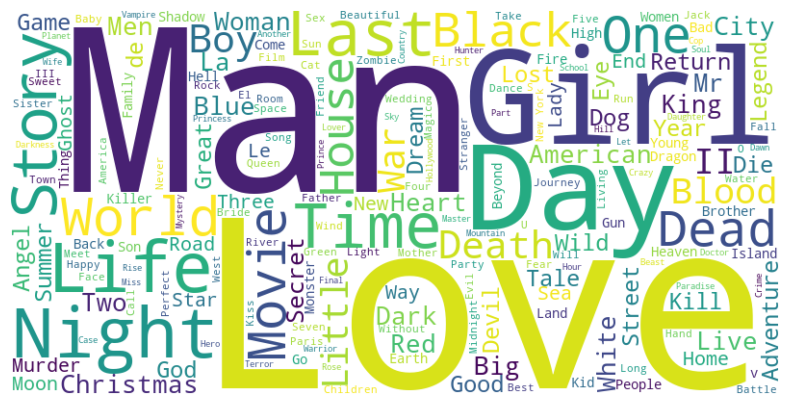

In [25]:
### Preparacion de la parte final , sistema de recomendacion de peliculas Análisis de la Columna de Títulos

# Supongamos que la columna de títulos está en el dataframe 'dfm' bajo 'title'
text = ' '.join(dfm['title'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

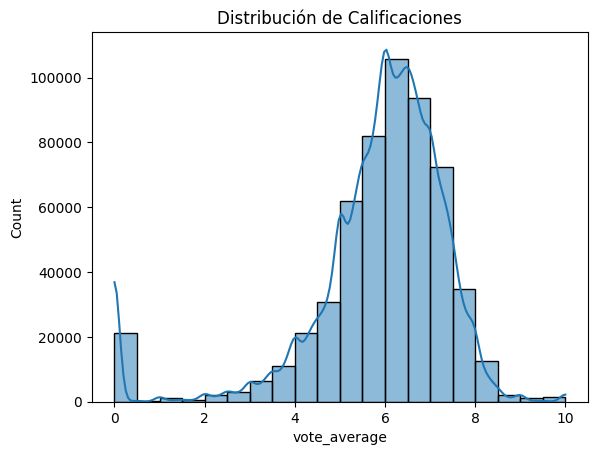

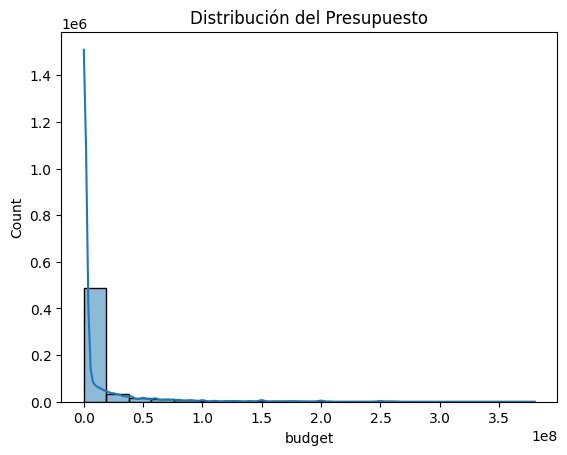

In [26]:


# Distribución de las calificaciones
sns.histplot(df['vote_average'].dropna(), bins=20, kde=True)
plt.title('Distribución de Calificaciones')
plt.show()

# Distribución del presupuesto
sns.histplot(df['budget'].dropna(), bins=20, kde=True)
plt.title('Distribución del Presupuesto')
plt.show()


In [27]:
# Vectorizar la columna de títulos para calcular la similitud
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(dfm['title'])

# Calcular la matriz de similitud de coseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [28]:
def recomendacion(titulo):
    # Asegurarse de que el título esté en el DataFrame
    if titulo not in df['title'].values:
        return f"La película '{titulo}' no está en el dataset."

    # Crear una serie que mapea títulos de películas a sus índices
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    # Obtener el índice de la película que coincide con el título
    idx = indices.get(titulo)
    
    # Si hay múltiples índices, escoger el primero (puedes ajustar esto si lo prefieres)
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]
    
    # Calcular las puntuaciones de similitud
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Ordenar las películas por similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Seleccionar las 5 películas más similares, excluyendo la película original
    sim_scores = sim_scores[1:6]
    
    # Obtener los índices de las películas
    movie_indices = [i[0] for i in sim_scores]
    
    # Devolver los títulos de las películas similares
    return df['title'].iloc[movie_indices].tolist()

recomendacion('Toy Story')

['Mallrats',
 'The Reluctant Debutante',
 'Once Were Warriors',
 'Mr. Smith Goes to Washington',
 'Groundhog Day']

In [29]:
# Supongamos que tienes características relevantes extraídas y una columna 'target' que indica si se debe recomendar
X = dfm[['feature_1', 'feature_2', 'feature_3']]
y = dfm['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluación del modelo
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

KeyError: "None of [Index(['feature_1', 'feature_2', 'feature_3'], dtype='object')] are in the [columns]"